# Année académique 2022-2023

## Semestre 2

### **Examen Python pour Machine Learning**

Vous écrirez vos codes dans les cellules prévues à cet effet!

# Partie 1. Numpy et Matplotlib

**Importer les librairies nécessaires**

In [1]:
import numpy as np  # useful for many scientific computing in Python#
import matplotlib.pyplot as plt # plotting library

## Question 1.1. On considère la fonction $f(x) = \dfrac{x^2+3x+7}{x+2}$

**1.** Représenter cette fonction sur $[-5,5]$ dans un repère $[-20,50]$ en abscisses et $[-15,15]$ en ordonnée. On mettra les grilles sur la figure.

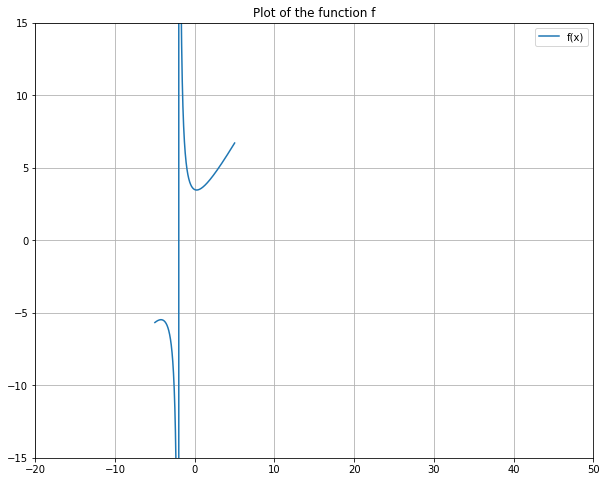

In [2]:
# Definition of the function f
def f(x):
    return (x**2 + 3*x + 7)/(x+2)

# vectorized version of f
f_vec = np.vectorize(f)

# create a numpy array of 1000 values from -5 to 5
x = np.linspace(-5, 5, 1000)

# Represent it graphically on x in [-20, 50] and y in [-15, 15]
plt.figure(figsize=(10, 8)) # define the size of the figure
plt.plot(x, f_vec(x))   # plot the function f
plt.axis([-20, 50, -15, 15])    # define the axis
plt.grid()  # display a grid
plt.legend(['f(x)'])    # display the legend
plt.title('Plot of the function f')  # display the title
plt.show()

**2.** Justifier que la fonction $f$ admet un minimum compris entre 0 et 50

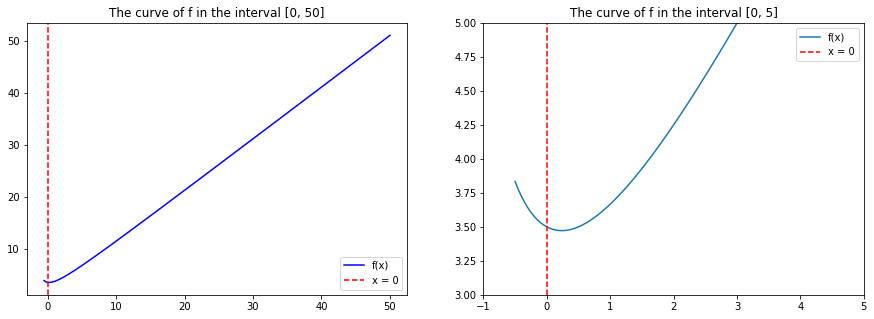

In [3]:
x =  np.linspace(-0.5, 50, 1000)

# add subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# add subplot 1 - the curve of f in the interval [0, 50]
ax[0].plot(x, f_vec(x), 'b', label='f(x)')
ax[0].axvline(x=0, color='r', linestyle='--') # place a horizontal line at x = 0
ax[0].legend(['f(x)', 'x = 0'])    # display the legend
# add title to ax[0]
ax[0].set_title('The curve of f in the interval [0, 50]')

# add subplot 2 - the curve of f in the interval [0, 10]
# let's plot the curve of f in the interval [0, 10] which is a subset of [0, 50]
ax[1].plot(x, f_vec(x))   # plot the function f
ax[1].axvline(x=0, color='r', linestyle='--') # place a horizontal line at x = 0
# plt.axhline(y=f(0), color='r', linestyle='--') # place a vertical line at y = f(0)
ax[1].axis([-1, 5, 3, 5])    # define the axis
ax[1].legend(['f(x)', 'x = 0'])    # display the legend

# add title to ax[1]
ax[1].set_title('The curve of f in the interval [0, 5]')
plt.show()


From this plot, we observe and conclude that f admits a minimum in [0, 5] which is a subset of [0, 50], hence in [0, 50]

**3.**  En utilisant une descente de gradient avec un pas $\alpha = 0.01$, trouver une valeur approchée de ce minumum. On initialisera la valeur de $x_0$ à $50$,
et on ferra 10000 itérations.

##### Answer

The derivative of $f$, denoted $f'$ is given by : $f'(x) = \frac {x^2 + 4\cdot x -1}{(x+2)^2}$

In [4]:
# The derivative of x
def df(x):
    return (x**2 + 4*x -1) / ( (x+2)**2 )

# vectorized version of df (overriding the previous df definition)
df = np.vectorize(df)

# The gradient descent algorithm
def GD(x, lr, epochs):
    x_list = []
    y_list = []
    for i in range(epochs):
        x = x - lr * df(x)
        y = f(x)
        x_list.append(x)
        y_list.append(y)
    return x, x_list, y_list

# find the local minimum of f starting with x = 50, lr = 0.01 and epochs = 10000
x, lr, epochs = 50, 0.01, 10000
local_min, list_x, list_y = GD(x, lr, epochs)

# print local minimum, number of epochs, and the final value of x
print("The local minimum occurs at", local_min)
print("Number of epochs:", len(list_x))

The local minimum occurs at 0.23606797749979125
Number of epochs: 10000


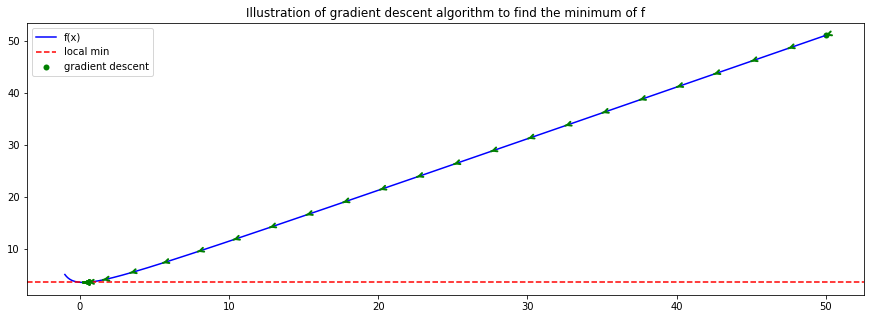

In [5]:
# plot the curve of f in [-1, 5]
x= np.linspace(-1, 50, 1000)

# Plot the gradient descent from x = 50
plt.figure(figsize=(15, 5))
plt.plot(x, f_vec(x), 'b', label='f(x)')
plt.axhline(y=f(local_min), color='r', linestyle='--') # place a horizontal line at y = f(0)
# plot the descent
step = 250
for i in range(0, len(list_x), step):
    plt.annotate('', xy=(list_x[i+1], list_y[i+1]), xytext=(list_x[i], list_y[i]),
        arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 2},
        va='center', ha='center', label='descent'
    )
plt.scatter(list_x[0], list_y[0], label='x_list', color='g', linewidths=0.01)
        
plt.legend(['f(x)', 'local min', 'gradient descent'])
plt.title("Illustration of gradient descent algorithm to find the minimum of f")
plt.show()


**4.** Représenter sur le graphique les points $x_0$, $x_{1000}$, $x_{2000}$, $x_{3000}$, $x_{4000}$ jusqu'à $x_{9000}$.

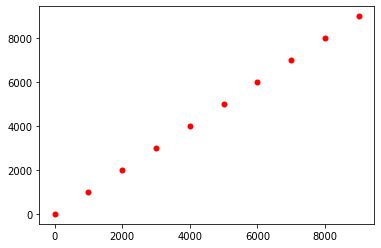

In [6]:
# get points from x = 0 to x = 9000 with a stet of 1000
x = np.linspace(0, 9000, 10)
plt.scatter(x, f_vec(x), color='r', linewidths=0.01)

## Question 1.2. On considère la fonction $g(x)=x+e^{x}$


**1.** En représentant graphiquement le fonction $g$, montrer que l'équation $g(x)=0$ admet une solution unique et trouver un intervalle dans lequel cette solution se trouve.

In [7]:
# create function g
def g(x):
    return x + np.exp(x)
# vectorize g
g = np.vectorize(g)

# Iterative method to find the local minimum of f and deduce the interval
# We verified manually that this function is contractant on [-1, 0] and deduced this iterative method
x = -100
while True:
    x = -np.exp(x)
    if x == -np.exp(x):
        break
print("Print the local minimum of f(x) is (", x, ", ", g(x), ")", sep="")

Print the local minimum of f(x) is (-0.5671432904097838, 0.0)


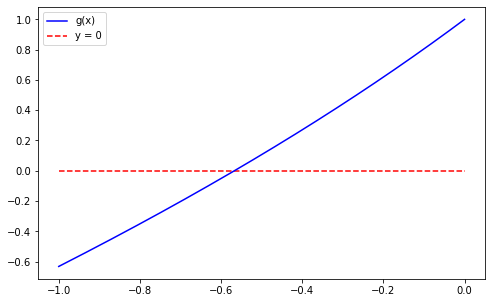

In [8]:
# Plotting the function g
x = np.linspace(-1, 0, 1000)
plt.figure(figsize=(8, 5))
plt.plot(x, g(x), 'b', label='g(x)')

plt.hlines(y=0, xmin=-1, xmax=0, color='r', linestyle='--')

plt.legend(['g(x)', 'y = 0'])
plt.show()

**2.** En utilisant la méthode de la dichotomie que vous implémenterez, trouver une valeur approchée de cette solution à $10^{-10}$ près

In [9]:
# Let write a binary search function to find the minimum of f(x)
def binary_search(f, low, high, tol=1e-5):
    while True:
        mid = (low + high) / 2
        if f(mid) > 0:
            high = mid
        else:
            low = mid
        if abs(f(mid)) < tol:
            break
    return mid

binary_search(g, -1, 0)

-0.567138671875

**3.** Placer ce point sur le graphique.

In [10]:
x = -0.567138671875
g(x)

array(7.23791185e-06)

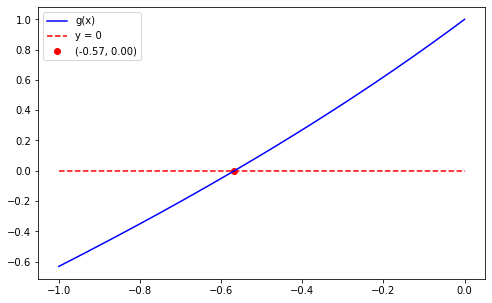

In [11]:
# place this value in the function f
local_min = binary_search(g, -1, 0)
(local_min, g(local_min))


# Plotting the function g
x = np.linspace(-1, 0, 1000)
plt.figure(figsize=(8, 5))
plt.plot(x, g(x), 'b', label='g(x)')

plt.hlines(y=0, xmin=-1, xmax=0, color='r', linestyle='--')
plt.scatter(local_min, g(local_min), color='r', linewidths=1)

plt.legend(['g(x)', 'y = 0', f'({local_min:.2f}, {g(local_min):.2f})'.format(local_min=local_min, g_local_min=g(local_min))])
plt.show()

# Partie 2. Pandas et Seaborn

On vous a donné le dataset `Mobile phone price.csv`. On va dans cet exercice faire du prétraitement des données.

**Importer les librairies nécessaires**

In [12]:
import pandas as pd     # data manipulation 
import seaborn as sns   # higher level data visualization

## Question 2.1. Connaissance du jeu de données!

**1.** Importer le dataset et l'enreigistrer dans une variable `phone`. Quelles sont les dimensions de ce dataset?


In [13]:
phone = pd.read_csv('Mobile phone price.csv')  # read the data

# print the dimension of the dataset
print("The dimension of the dataset is:", phone.shape)

The dimension of the dataset is: (407, 8)


**2.** On veut prédire le prix d'un téléphone en fonction de certaines de ses caractéristiques. Combien de caractéristiques permettent ici de faire une prédiction du prix d'un téléphone?

In [14]:
# See the first five rows 
phone.columns = [col.strip().lower() for col in phone.columns]   # lower the columns
print("The columns fo the dataset are :")

columns = phone.columns     # Get the columns of the dataset
print(*columns, sep=', ')

The columns fo the dataset are :
brand, model, storage, ram, screen size (inches), camera (mp), battery capacity (mah), price ($)


In [15]:
# Get the number of characteristics permmiting to classify the phone price
print("The number of characteristics permmiting to classify the phone price is:", phone.shape[1] - 1)

The number of characteristics permmiting to classify the phone price is: 7


In [16]:
# remove unnecessary caracters in columns for future manipulation
phone.columns = ['brand', 'model', 'storage', 'ram', 'screen_size', 'camera', 'battery', 'price'];

**3.** Combien de téléphones ont une RAM de  3GB?

In [17]:
phone.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [18]:
# remove all spaces fom elements of column ram
phone['ram'] = phone['ram'].apply(lambda x: x.replace(' ', ''))

# Get the number of phones with a RAM of 3GB
print("The number of phones with a RAM of 3GB is:", phone[phone['ram'] == '3GB'].shape[0])

The number of phones with a RAM of 3GB is: 29


In [19]:
# For general purpose, we will remove all spaces from all elements of the dataset

# remove all spaces from all elements of the dataset and lower the characters
phone = phone.apply(lambda x: x.str.replace(" ", '').str.lower() if x.dtype == "object" else x)

**4.** Quel est le prix du téléphone le plus élévé? Quel est la marque de ce téléphone?

In [20]:
def clean(x):
    return x.replace('$', '').replace(",", '')

phone['price'] = phone['price'].apply(clean).astype('float64')
phone['price'].unique()

# Get the price of the phone with the highest price
print("The price of the phone with the highest price", phone['price'].max())

The price of the phone with the highest price 1999.0


**5.** Combien de modèles de Samsung sont étudiés dans ce dataset?

In [21]:
# Get the number of models of brand samsung
print("The number of models of brand samsung is:", phone[phone['brand'] == 'samsung'].shape[0])

The number of models of brand samsung is: 79


**6.** Quelle est la moyenne des prix des téléphones de ce jeux de données!

In [22]:
#print("The mean of prices in the dataset is:", phone['price'].mean())
phone['price'].mean()

408.3144963144963

In [23]:
for val in phone['brand'].unique():
    print("The mean of prices of brand", val, f"is: {phone[phone['brand'] == val]['price'].mean(): .4f}")

The mean of prices of brand apple is:  745.6667
The mean of prices of brand samsung is:  480.4051
The mean of prices of brand oneplus is:  644.3333
The mean of prices of brand xiaomi is:  282.8806
The mean of prices of brand google is:  699.0000
The mean of prices of brand oppo is:  376.1429
The mean of prices of brand vivo is:  323.0000
The mean of prices of brand realme is:  206.9070
The mean of prices of brand motorola is:  278.1304
The mean of prices of brand nokia is:  244.7143
The mean of prices of brand sony is:  1299.0000
The mean of prices of brand lg is:  615.6667
The mean of prices of brand asus is:  874.0000
The mean of prices of brand blackberry is:  499.0000
The mean of prices of brand cat is:  299.0000
The mean of prices of brand huawei is:  783.1667


## Question 2.2. Suppression de la colonne modèle

Dans la suite on va supprimer la colonne `Model` qui n'apporte pas une très grande information.

Créer un nouveau DataFrame `Phone` dans lequel vous mettrez le résultat de cette opération. 

Dans la suite on travaille sur `Phone`.

In [24]:
# delete the column model
Phone = phone.drop('model', axis=1)

In [25]:
Phone.head()

,brand,storage,ram,screen_size,camera,battery,price
0,apple,128gb,6gb,6.1,12+12+12,3095,999.0
1,samsung,256gb,12gb,6.8,108+10+10+12,5000,1199.0
2,oneplus,128gb,8gb,6.7,48+50+8+2,4500,899.0
3,xiaomi,128gb,6gb,6.67,64+8+5+2,5020,279.0
4,google,128gb,8gb,6.4,50+12.2,4614,799.0


## Question 2.3. Suppression de quelques modèles de téléphone

Les marques Google, Asus, Blackberry, LG, Sony et Cat sont en très petit nombre on va les retirer du jeu de données!!

Gargez le résultat une fois de plus dans la variable `Phone`.

In [26]:
# remove where brand in ['google', 'asus', 'blackberry', 'lg', 'sony', 'cat']

Phone = Phone[~Phone['brand'].isin(['google', 'asus', 'blackberry', 'lg', 'sony', 'cat'])]
Phone['brand'].unique()

array(['apple', 'samsung', 'oneplus', 'xiaomi', 'oppo', 'vivo', 'realme',
       'motorola', 'nokia', 'huawei'], dtype=object)

## Question 2.4. Traitement des colonnes `Storage` et `RAM`

Convertir les colonne `Storage` et `RAM` en float. On supprimera toutes les unités.

Gardez le résultat une fois de plus dans la variable `Phone`.

In [27]:
phone['storage'].head()

0    128gb
1    256gb
2    128gb
3    128gb
4    128gb
Name: storage, dtype: object

In [28]:
Phone['storage'] = Phone['storage'].apply(lambda x: float(x.replace('gb', '')))

In [29]:
Phone['ram'] = Phone['ram'].apply(lambda x: float(x.replace('gb', '')))

## Question 2.5 Traitement de la colonne `Screen Size (inches)`

Convertir les données de cette colonne en float!!

Gardez le résultat une fois de plus dans la variable `Phone`.

In [30]:
def clean(x):
    output = (x.replace('(unfolded)', ''))
    output = eval(output)
    return output

In [31]:
Phone['screen_size'] = Phone['screen_size'].apply(clean)

## Question 2.6  Préprocessing de la colonne `Price`

La colonne `Price` contient parfois des unités parfois juste des nombres. Pour entrainer notre modèle nous avons besoin d'avoir uniquement des float.

Convertir toutes les données de cette colonne en float. On supprimera évidemment les symboles de  dollar quand il y en a.

Gardez le résultat une fois de plus dans la variable `Phone`.

In [32]:
# Le nettoyage de cette colonne a deja ete fait plus haut
Phone['price'].dtype

dtype('float64')

## Question 2.7  Traitement de la colonne `Camera (MP)`

Dans cette colonne, on va tout convertir en float. En particulier, on va faire la somme des capacités de toutes les caméras du téléphone et c'est ce résultat qui sera la valeur finale. Par exemple, si on a `13MP + 2MP + 2MP` le résultat devrait etre: `17`, si on a `50 + 50 + 13 + 3` le résultat devrait etre `116`. 

Gardez le résultat final dans la variable `data`

In [33]:
from  string import ascii_letters
from string import digits
def clean(x):
    input = x.replace('mp', '')
    for c in ascii_letters:
        input = input.replace(c, '')
    if input[-1] not in  digits:
        input = input[:-1]
    return eval(input)

Phone['camera'] = Phone['camera'].apply(clean)

On est maintenant près à entrainer un modèle de regression pour prédire les différents prix.

# Partie 3. Scikit-Learn

## Question 3.1 Création des données d'entrainement et de test!

Utiliser `train_test_split` de `sklearn` pour contruire ces jeux de données. On mettra `25%` des données dans le test et on prendra un `random_state = 42`  

In [34]:
from sklearn.model_selection import train_test_split

# split the dataset
train, test = train_test_split(Phone, test_size=0.25, random_state=42)

## Question 3.2 Contruction d'une chaine de `preprocessing` pour la transformation des données.

Le dataset contient maintenant des données numériques et des données non numériques. On doit encoder les données numériques (encodage OneHot) et standardiser les données numériques. Pour éviter de la faire pour le train_set, et après pour le test_set, on utilise souvent un pipeline de traitement.

* En utilisant le `make_column_selector` de scikit-learn pour la séparation des données numériques des données non numériques. On prendra comme nom des données numériques `num_col` et comme nom des données non numérique `cat_col`
* Construire un transformer `preprocessor` en utilisant `make_column_transformer` qui standardise (`StandardScaler()`) les données numérique et one hot encore (`OneHotEncoder()`) les données non numériques.

In [35]:
# use make_column_selector to seperate the features by their types
from sklearn.compose import make_column_selector as selector
# use the selector
# create a selector to take price and storage

num_col = selector(dtype_include=np.number)(Phone.drop('price', axis=1))
cat_col = selector(dtype_exclude=np.number)(Phone.drop('price', axis=1))

# use make_column_transformer to apply different preprocessing to different features
# use standard scaler for numerical features
# use one hot encoder for categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
# use the column transformer
preprocessor = make_column_transformer((StandardScaler(), num_col),
                                        (OneHotEncoder(), cat_col))

## Question 3.3 Algorithme LinearRegression()

* Construire un modelè `LR` qui est une pipeline qui contient le `preprocessor` de la question 2 et qui est suivi du modèle `LinearRegression()`
* Entrainer puis évaluer ce modèle.

In [36]:
# Construct a linear regression model using the preprocessor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
# use the pipeline
LR = make_pipeline(preprocessor, LinearRegression())


In [37]:
# fit the model
LR.fit(train.drop('price', axis=1), train['price'])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['storage', 'ram',
                                                   'screen_size', 'camera',
                                                   'battery']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['brand'])])),
                ('linearregression', LinearRegression())])

In [38]:
LR.score(test.drop('price', axis=1), test['price'])

0.8571216750909461

## Question 3.4 Algorithme RandomForestRegressor()

* Construire un modelè `rdf` qui est une pipeline qui contient le `preprocessor` de la question 2 et qui est suivi du modèle `RandomForestRegressor()`
* Entrainer puis évaluer ce modèle.

In [39]:
# Construct a random forest model using the preprocessor
from sklearn.ensemble import RandomForestRegressor
# use the pipeline
rdf = make_pipeline(preprocessor, RandomForestRegressor())

# train the model
rdf.fit(train.drop('price', axis=1), train['price'])

# evaluate the model
# predict the price of the test set
pred = rdf.predict(test.drop('price', axis=1))

rdf.score(test.drop('price', axis=1), test['price'])

0.9286431425036308

## Question 3.5 Cross Validation. 

En général, pour mesurer les performances réelles d'un modèle on le soumet à une *cross validation*. 

Réaliser une cross validation pour le modèle `rdf` avec un `cv = 10`, un `random_state = 0`, un `return_estimator = True`

In [43]:
# import cross_validate
from sklearn.model_selection import cross_validate
# use cross_validate with rdf, cv = 10, random_state = 0, return_estimator = True
# use the cross validation
scores = cross_validate(rdf, Phone.drop('price', axis=1), Phone['price'], cv=10, return_estimator=True)

# get the mean of the scores
print("The mean of the scores is:", scores['test_score'].mean())

The mean of the scores is: 0.8448408628483767
